In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Arun\Downloads\fakenews.csv",encoding='utf-8')

In [4]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
df=df['text']

In [6]:
len(df)

7613

In [7]:
df

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [8]:
pd.set_option("display.max_colwidth", None)
df.head()

0                                                                    Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1                                                                                                   Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3                                                                        13,000 people receive #wildfires evacuation orders in California 
4                                                 Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
Name: text, dtype: object

import all the necessary packages

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

download stopwords

In [12]:

import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))
print(STOP_WORDS)

326
{'seeming', 'however', "'ve", 'herein', 'give', 'show', '’s', 'nowhere', 'please', 'those', 'sometimes', 'ten', 'together', 'fifteen', 'six', 'once', 'upon', 'could', 'everyone', 'even', 'something', 'behind', 'ca', 'mine', 'were', 'latter', 'serious', 'seemed', 'along', 'get', 'with', 'say', 'wherever', 'to', "'d", 'either', 'really', 'on', 'only', 'neither', 'somewhere', 'their', 'always', 'becoming', 'or', 'what', 'and', 'without', 'these', 'us', 'doing', 'am', 'a', 'how', 'the', 'besides', "'m", 'of', '’ve', 'least', 'its', 'every', 'therein', 'ever', 'before', 'whether', '‘ve', 'been', 'latterly', 'go', 'whence', 'put', 'may', '‘d', 'are', 'myself', 'against', 'anywhere', 'then', 'hereafter', 'own', 'was', 'why', 'whom', 'nor', 'being', 'unless', 'below', 'ours', 'yourselves', '’re', 'not', 'side', 'less', 'seem', 'two', "n't", 'nothing', 'due', 'afterwards', 'must', 'they', 'him', 'becomes', 'did', 'full', 'this', 'would', 'whither', 'well', 'name', 'become', 'there', 'noone'

Data preprocessing. remove the stopwords and punctuation marks

In [13]:

STOPWORDS = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
STOPWORDS=STOPWORDS|STOP_WORDS
def clean_text(text):
    stop_not = " ".join([i for i in text.lower().split() if i not in STOPWORDS and len(i) > 3])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punctuation_free.split())
    return normalized
document_cleaned = [clean_text(text).split() for text in df]

In [14]:
document_cleaned

[['deed', 'reason', 'earthquake', 'allah', 'forgive'],
 ['forest', 'fire', 'near', 'ronge', 'sask', 'canada'],
 ['resident',
  'asked',
  'shelter',
  'place',
  'notified',
  'officer',
  'evacuation',
  'shelter',
  'place',
  'order',
  'expected'],
 ['13000',
  'people',
  'receive',
  'wildfire',
  'evacuation',
  'order',
  'california'],
 ['sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfire', 'pours', 'school'],
 ['rockyfire',
  'update',
  'california',
  'hwy',
  'closed',
  'direction',
  'lake',
  'county',
  'fire',
  'cafire',
  'wildfire'],
 ['flood',
  'disaster',
  'heavy',
  'rain',
  'cause',
  'flash',
  'flooding',
  'street',
  'manitou',
  'colorado',
  'spring',
  'area'],
 ['hill', 'fire', 'wood'],
 ['there', 'emergency', 'evacuation', 'happening', 'building', 'street'],
 ['afraid', 'tornado', 'coming', 'area'],
 ['people', 'died', 'heat', 'wave'],
 ['haha',
  'south',
  'tampa',
  'getting',
  'flooded',
  'hah',
  'wait',
  'second',
  'live',
  'south',
  '

In [15]:
type(STOP_WORDS)

set

In [16]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii','ignore').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

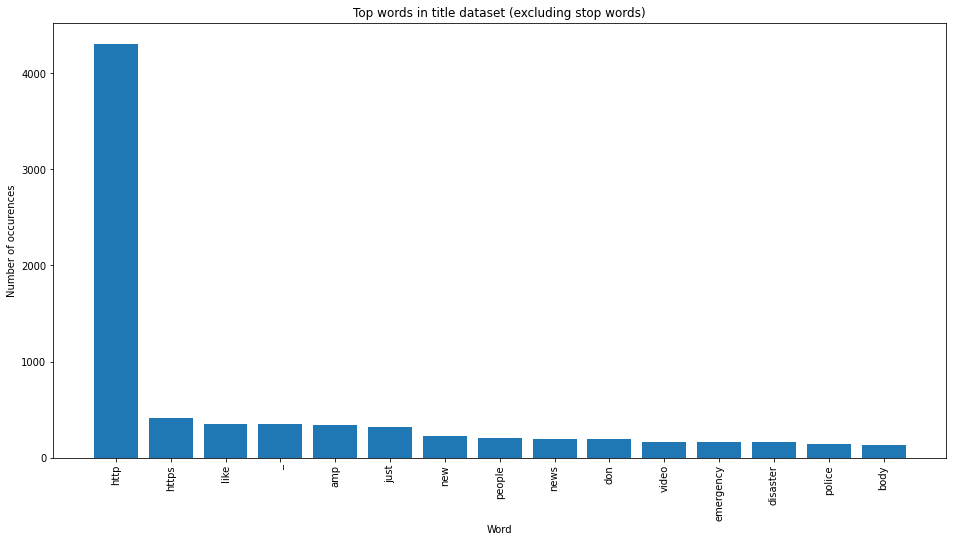

In [17]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in title dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [18]:
df.shape[0]

7613

In [19]:
tagged_tweet = [TextBlob(df[i]).pos_tags for i in range(df.shape[0])]

text blob is used to part-of-speech tagging

In [20]:
tagged_tweet_df = pd.DataFrame({'tags':tagged_tweet})

word_counts = [] 
pos_counts = {}

for tweet in tagged_tweet_df[u'tags']:
    word_counts.append(len(tweet))
    for tag in tweet:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per tweet: ', np.mean(word_counts))

Total number of words:  123111
Mean number of words per tweet:  16.171154603966897


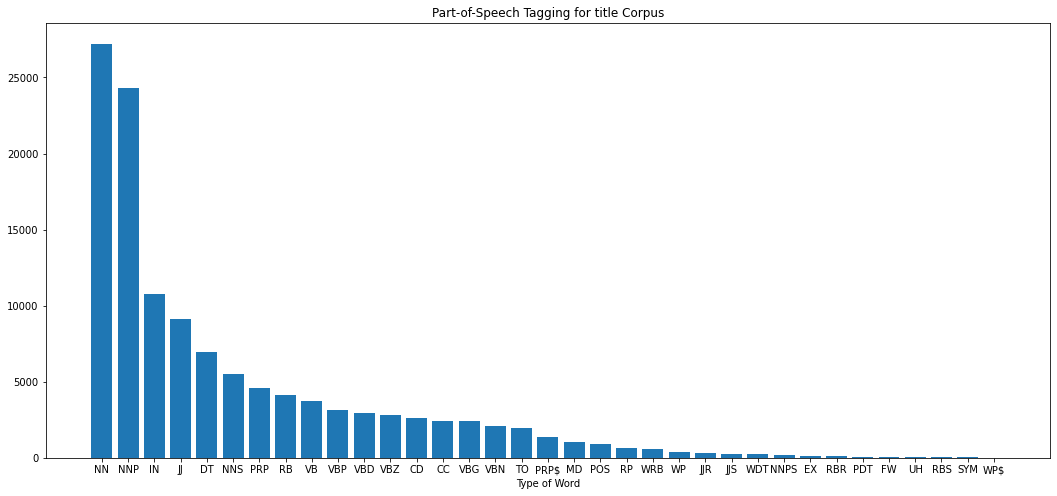

In [21]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for title Corpus');
ax.set_xlabel('Type of Word');

text is converted to vector form

In [22]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = df.sample(n=7613, random_state=0).values

print('Text before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Text after vectorization: \n{}'.format(small_document_term_matrix[123]))

Text before vectorization: NowPlaying Rock You Like A Hurricane - Scorpions http://t.co/JRztpT8IJq
Text after vectorization: 
  (0, 9192)	1
  (0, 11323)	1
  (0, 9257)	1
  (0, 16029)	1
  (0, 13287)	1
  (0, 16538)	1
  (0, 10367)	1


4 number of topics are selected

In [23]:
n_topics = 5

LSA model

In [24]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [25]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [26]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [27]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)#.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [28]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  http û_ new news video emergency amp california police crash
Topic 2:  amp people time got going life know love good buildings
Topic 3:  https û_ gt accident new youtube people national refugees explosion
Topic 4:  like just don body year think feel old looks ass
Topic 5:  disaster obama devastated typhoon declares saipan northern http signs wreck


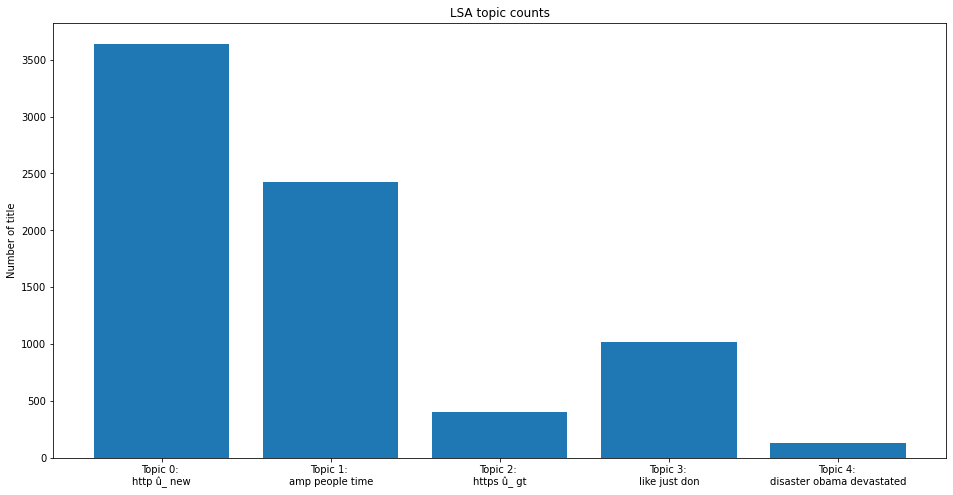

In [29]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of title');
ax.set_title('LSA topic counts');
plt.show()

In [30]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7613 samples in 0.009s...
[t-SNE] Computed neighbors for 7613 samples in 0.445s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7613
[t-SNE] Computed conditional probabilities for sample 2000 / 7613
[t-SNE] Computed conditional probabilities for sample 3000 / 7613
[t-SNE] Computed conditional probabilities for sample 4000 / 7613
[t-SNE] Computed conditional probabilities for sample 5000 / 7613
[t-SNE] Computed conditional probabilities for sample 6000 / 7613
[t-SNE] Computed conditional probabilities for sample 7000 / 7613
[t-SNE] Computed conditional probabilities for sample 7613 / 7613
[t-SNE] Mean sigma: 0.008565
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.248016
[t-SNE] KL divergence after 2000 iterations: 0.805755


In [31]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [32]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [33]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

LDA model

In [34]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [35]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [36]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  http video û_ https youtube families legionnaires storm army water
Topic 2:  http new û_ body reddit rt police home content watch
Topic 3:  http like just https people amp û_ suicide killed crash
Topic 4:  http https just disaster like amp california don got news
Topic 5:  http amp gt don û_ https thunderstorm storm severe damage


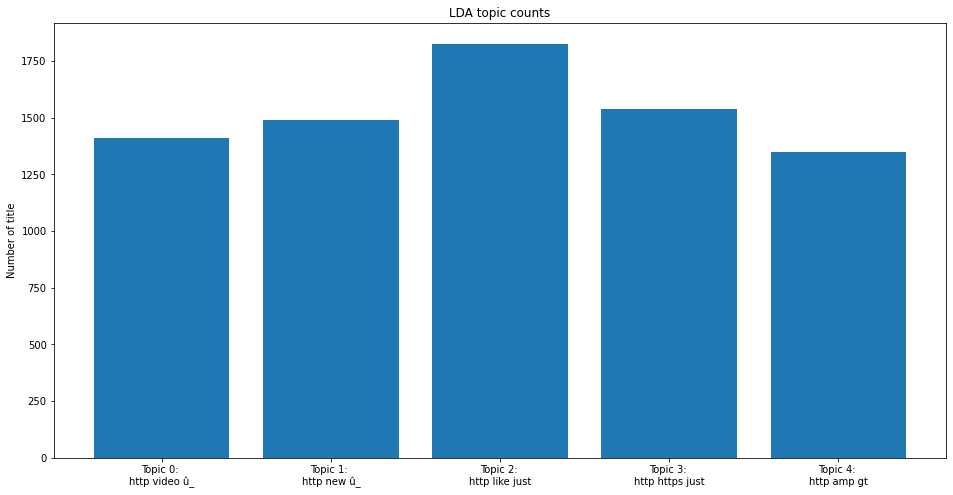

In [37]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of title');

In [38]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7613 samples in 0.013s...
[t-SNE] Computed neighbors for 7613 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7613
[t-SNE] Computed conditional probabilities for sample 2000 / 7613
[t-SNE] Computed conditional probabilities for sample 3000 / 7613
[t-SNE] Computed conditional probabilities for sample 4000 / 7613
[t-SNE] Computed conditional probabilities for sample 5000 / 7613
[t-SNE] Computed conditional probabilities for sample 6000 / 7613
[t-SNE] Computed conditional probabilities for sample 7000 / 7613
[t-SNE] Computed conditional probabilities for sample 7613 / 7613
[t-SNE] Mean sigma: 0.012564
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.086578
[t-SNE] KL divergence after 2000 iterations: 0.749722


In [39]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [40]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(document_cleaned, min_count=5, threshold=100) 
#trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(document_cleaned)# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=5,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

[(0,
  '0.002*"fire" + 0.002*"amp" + 0.002*"time" + 0.002*"hurricane" + 0.001*"woman" + 0.001*"terrorism" + 0.001*"rescued" + 0.001*"official" + 0.001*"news" + 0.001*"drought"'),
 (1,
  '0.009*"like" + 0.004*"people" + 0.003*"amp" + 0.003*"look" + 0.003*"life" + 0.003*"know" + 0.003*"cant" + 0.003*"time" + 0.003*"fire" + 0.002*"going"'),
 (2,
  '0.004*"news" + 0.004*"weapon" + 0.003*"year" + 0.003*"nuclear" + 0.002*"train" + 0.002*"hiroshima" + 0.002*"the" + 0.002*"death" + 0.002*"flood" + 0.001*"military"'),
 (3,
  '0.004*"fire" + 0.003*"california" + 0.002*"killed" + 0.002*"earthquake" + 0.002*"suicide_bomber" + 0.002*"sinkhole" + 0.002*"suicide_bombing" + 0.002*"16yr_suicide" + 0.002*"bomber_detonated" + 0.002*"wildfire"'),
 (4,
  '0.005*"video" + 0.003*"emergency" + 0.003*"amp" + 0.003*"storm" + 0.002*"warning" + 0.002*"police" + 0.002*"plan" + 0.002*"injury" + 0.002*"weather" + 0.002*"road"')]

In [41]:
lda_df = lda_model.get_document_topics(doc_term_matrix,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))
num_topics = lda_model.num_topics
lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Automated_topic_id
0,0.049273,0.050936,0.571157,0.277628,0.051006,2
1,0.608434,0.050094,0.042481,0.046660,0.252332,0
2,0.027187,0.239917,0.027938,0.025574,0.679384,4
3,0.042126,0.047924,0.043016,0.754635,0.112299,3
4,0.034324,0.482176,0.034877,0.413068,0.035556,1


In [42]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -9.682847678379552

Coherence Score using c_v:  0.48795893083824493

Coherence Score using u_mass:  -13.774839825986462


In [43]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

In [44]:
lda_viz

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.096454  0.007637       1        1  35.771651
4      0.023638 -0.051299       2        1  19.266439
2      0.017522 -0.003710       3        1  15.624665
0      0.015181 -0.004572       4        1  15.300006
3      0.040113  0.051944       5        1  14.037239, topic_info=        Term        Freq       Total Category  logprob  loglift
108     like  192.000000  192.000000  Default  30.0000  30.0000
277    video   66.000000   66.000000  Default  29.0000  29.0000
1985  weapon   59.000000   59.000000  Default  28.0000  28.0000
128     look   67.000000   67.000000  Default  27.0000  27.0000
204     year   61.000000   61.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
209     shot   10.887853   21.080907   Topic5  -6.6696   1.3027
4234    bomb   11.886693   27.980217   Topic5  -6.5819   1.1074
1863  report    9.322466   17.859943   Topic5  -6.8249   1.3133
85     crash    9.653134   22.507905   Topic5  -6.7900   1.1169
870     kill    8.334963   21.160942   Topic5  -6.9368   1.0318

[273 rows x 6 columns], token_table=       Topic      Freq              Term
term                                    
16556      2  0.752395    12000_nigerian
18146      5  0.934812      16yr_suicide
700        1  0.061107              2015
700        3  0.122213              2015
700        4  0.611067              2015
...      ...       ...               ...
2377       4  0.746341  youtube_playlist
17528      4  0.832240     youûªve_home
1224       1  0.294899              zone
1224       3  0.638948              zone
19043      5  0.840656     ûïwhen_coach

[491 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 1, 4])

In [49]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
lsi_model.print_topics(num_topics=10,num_words=10)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [50]:
# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lsi_c_v = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using c_v: ', coherence_lsi_c_v)# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lsi_u_mass = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using u_mass: ', coherence_lsi_u_mass)


Coherence Score for LSI using c_v:  0.4837195594942536

Coherence Score for LSI using u_mass:  -11.984039295900002


Compare two models

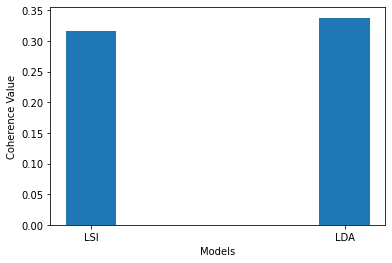

In [51]:
from gensim.models import CoherenceModel
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]
lsi_coherence = CoherenceModel(topics=lsi_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
import numpy as np
def topic_model_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
topic_model_graph([lsi_coherence, lda_coherence],
                   ['LSI',  'LDA'])